# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/master/files/country_music.jpeg "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Country Music Performers](https://en.wikipedia.org/wiki/List_of_country_music_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [Zach Bryan](https://en.wikipedia.org/wiki/Zach_Bryan) links to [Kacey Musgraves](https://en.wikipedia.org/wiki/Kacey_Musgraves), for example (it really does). You will note that the country music list includes performers that we don't typically think of as country musicians (e.g. [Bon Jovi](https://en.wikipedia.org/wiki/Bon_Jovi) or [Mark Knopfler](https://en.wikipedia.org/wiki/Mark_Knopfler), but we'll just roll with it and be open minded).

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment 2022**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

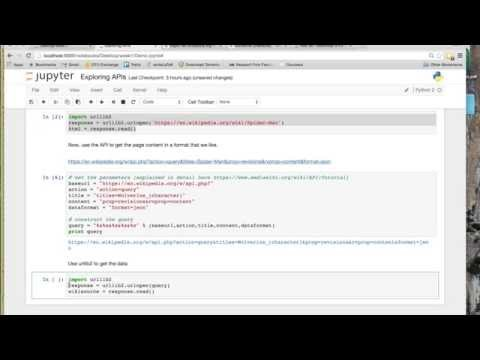

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_country_music_performers and extract all of the links using your regular expressions from above.
>   * Hint: To make this easy, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names.

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your download the cleanest possible version of the page (the wikitext). [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per character, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [1]:
import re

# Read in the text file (assuming it's cleaned up and saved locally)
with open('wikipedia.txt', 'r', encoding='utf-8') as file:
    content = file.read()

# Regular expression to match all links in the format [[link|display_text]] or [[link]]
links = re.findall(r'\[\[(.*?)(?:\|(.*?))?\]\]', content)

# Clean up and process links (handle pipes for display text)
artists = []
for link, display_text in links:
    # Remove any quotes from the artist name (or any other unwanted characters)
    clean_link = link.replace('"', '').strip()

    # Use display text if present, otherwise use the clean link
    if display_text:
        artists.append(display_text.strip())
    else:
        artists.append(clean_link)

# Output the extracted artist names
for artist in artists:
    print(artist)

# Count the number of artists
artist_count = len(artists)

# Output the count of artist names
print(f"Total number of artists: {artist_count}")

The Abrams Brothers
Ace in the Hole Band
Roy Acuff
Kay Adams
Ryan Adams
Doug Adkins
Trace Adkins
David Stringbean Akeman
Rhett Akins
Alabama
Lauren Alaina
Jason Aldean
Alee
Daniele Alexander
Jessi Alexander
Gary Allan
Susie Allanson
Deborah Allen
Duane Allen
Harley Allen
Jimmie Allen
Rex Allen
Terry Allen
Allman Brothers Band
Gregg Allman
Tommy Alverson
Dave Alvin
Amazing Rhythm Aces
American Young
Don Amero
Colin Amey
Al Anderson
Bill Anderson
Brent Anderson
Coffey Anderson
John Anderson
Keith Anderson
Liz Anderson
Lynn Anderson
Sharon Anderson
Elisabeth Andreassen
Ingrid Andress
Courtney Marie Andrews
Jessica Andrews
Sheila Andrews
Lisa Angelle
Michaela Anne
Lorenzo Antonio
Archer/Park
Katie Armiger
Eddy Arnold
Ashley Arrison
Tenille Arts
Leon Ashley
Kassi Ashton
Susan Ashton
Ernest Ashworth
Asleep at the Wheel
Chet Atkins
Rodney Atkins
Audrey Auld-Mezera
Bryan Austin
Julian Austin
Shawn Austin
Sherrié Austin
Gene Autry
Autumn Hill
Avicii
Hoyt Axton
Steve Azar
Barrett Baber
Backstree

In [2]:
import requests
import os

# Base URL for Wikipedia API
BASE_API_URL = "https://en.wikipedia.org/w/api.php"

# Directory to save text files
SAVE_DIR = "country_artists_wikitext"

# Ensure the directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

def fetch_wikitext(page_title):
    """Fetch the wikitext of a Wikipedia page."""
    params = {
        "action": "query",
        "format": "json",
        "titles": page_title,
        "prop": "revisions",
        "rvprop": "content",
        "formatversion": "2",
    }
    response = requests.get(BASE_API_URL, params=params)
    data = response.json()
    pages = data.get("query", {}).get("pages", [])
    
    if pages and "revisions" in pages[0]:
        return pages[0]["revisions"][0]["content"]
    return None

def save_wikitext(artist, wikitext):
    """Save the wikitext to a file."""
    # Replace spaces and invalid characters with underscores for file names
    safe_artist = re.sub(r'[\\/*?:"<>|]', "_", artist)
    filename = os.path.join(SAVE_DIR, f"{safe_artist.replace(' ', '_')}.txt")
    with open(filename, "w", encoding="utf-8") as file:
        file.write(wikitext)

# Iterate through the list of artists and download their Wikipedia page wikitext
for artist in artists:
    print(f"Fetching wikitext for {artist}...")
    wikitext = fetch_wikitext(artist)
    
    if wikitext:
        save_wikitext(artist, wikitext)
        print(f"Saved wikitext for {artist}.")
    else:
        print(f"Wikitext for {artist} not found or page is missing.")

print("Done fetching all wikitexts.")


Fetching wikitext for The Abrams Brothers...
Saved wikitext for The Abrams Brothers.
Fetching wikitext for Ace in the Hole Band...
Saved wikitext for Ace in the Hole Band.
Fetching wikitext for Roy Acuff...
Saved wikitext for Roy Acuff.
Fetching wikitext for Kay Adams...
Saved wikitext for Kay Adams.
Fetching wikitext for Ryan Adams...
Saved wikitext for Ryan Adams.
Fetching wikitext for Doug Adkins...
Saved wikitext for Doug Adkins.
Fetching wikitext for Trace Adkins...
Saved wikitext for Trace Adkins.
Fetching wikitext for David Stringbean Akeman...
Wikitext for David Stringbean Akeman not found or page is missing.
Fetching wikitext for Rhett Akins...
Saved wikitext for Rhett Akins.
Fetching wikitext for Alabama...
Saved wikitext for Alabama.
Fetching wikitext for Lauren Alaina...
Saved wikitext for Lauren Alaina.
Fetching wikitext for Jason Aldean...
Saved wikitext for Jason Aldean.
Fetching wikitext for Alee...
Saved wikitext for Alee.
Fetching wikitext for Daniele Alexander...
Sav

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the country performers. 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer, which is a node in your network. 
* Find all the hyperlinks in a performers page that link to another node of the network (e.g. an other perfomer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Country Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have around 2k nodes and around 18k edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 3*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [10]:
# Start by making a single page work
import re

# Specify the path to one of the artist's Wikipedia wikitext files
file_path = "country_artists_wikitext/Aaron_Lewis.txt"  # Example file

# Function to extract outgoing links from the wikitext
def extract_outgoing_links(wikitext):
    # Regular expression to match all outgoing links in the format [[link|display_text]] or [[link]]
    links = re.findall(r'\[\[(.*?)(?:\|(.*?))?\]\]', wikitext)
    outgoing_links = []

    for link, display_text in links:
        # Clean the link by stripping whitespace
        clean_link = link.strip()
        outgoing_links.append(clean_link)

    return outgoing_links

# Read the wikitext from the specified file
with open(file_path, 'r', encoding='utf-8') as file:
    wikitext = file.read()

# Extract outgoing links
outgoing_links = extract_outgoing_links(wikitext)

# Output the extracted links
print("Outgoing links:")
for link in outgoing_links:
    print(link)

print(f"Total number of outgoing links: {len(outgoing_links)}")


Outgoing links:
Staind
Rutland (city), Vermont
Massachusetts
Alternative metal
post-grunge
nu metal
country rock
alternative country
Flip Records (1994)
Elektra Records
Atlantic Records
R&J Records
Dot Records
Big Machine Label Group
Staind
alternative metal
Staind
country music
Town Line
The Road (Aaron Lewis album)
Great American Country
Hit Parader
Rutland (city), Vermont
Longmeadow, Massachusetts
Longmeadow High School
Forest Park, Springfield, Massachusetts
Rolling Stone
country music
Town Line
Stroudavarious Records
Country Boy (Aaron Lewis song)
George Jones
Charlie Daniels
Chris Young (singer)
The Illusion of Progress
Kid Rock
File:Aaron Lewis 2013.jpg
The Road (Aaron Lewis album)
State I'm In (album)
Am I the Only One (Aaron Lewis song)
Left-wing politics
Frayed at Both Ends
Limp Bizkit
Significant Other (album)
Crawling (song)
Linkin Park
Reanimation (Linkin Park album)
Sevendust
Animosity (Sevendust album)
Cold (band)
13 Ways to Bleed on Stage
Jimmie's Chicken Shack
re.prese

In [23]:
import os
import re
import networkx as nx

# Extract list of performers from the Wikipedia text file
with open('wikipedia.txt', 'r', encoding='utf-8') as file:
    content = file.read()

performers = extract_outgoing_links(content)
print(f"Total number of performers: {len(performers)}")

# Directory containing the Wikipedia wikitext files
SAVE_DIR = "country_artists_wikitext"

#Create a directed graph
G = nx.DiGraph()

# Loop through all files in the directory
for filename in os.listdir(SAVE_DIR):
    if filename.endswith('.txt'):
        file_path = os.path.join(SAVE_DIR, filename)

        # Read the wikitext from the specified file
        with open(file_path, 'r', encoding='utf-8') as file:
            wikitext = file.read()

        # Extract outgoing links
        outgoing_links = extract_outgoing_links(wikitext)

        # Count words using regex
        word_count = len(re.findall(r'\b\w+\b', wikitext))  # Count words (ignores symbols)

        # Filter links to keep only valid performers
        valid_links = [link for link in outgoing_links if link in performers]

        # Store the artist name and the length of the wikitext
        artist_name = filename[:-4].replace('_', ' ')  # Remove '.txt' and replace underscores with spaces
        G.add_node(artist_name, wikitext_length=word_count)  # Store word count as an attribute

        # Add directed edges for each valid link
        for link in valid_links:
            G.add_edge(artist_name, link)

# Remove isolated nodes (nodes with no in- or out-degrees)
isolated_nodes = [node for node in G.nodes() if G.in_degree(node) == 0 and G.out_degree(node) == 0]
G.remove_nodes_from(isolated_nodes)

# Output basic information about the graph
print(f"Total number of nodes: {G.number_of_nodes()}")
print(f"Total number of edges: {G.number_of_edges()}")

# Extract the largest weakly connected component
largest_component = max(nx.weakly_connected_components(G), key=len)
G_largest = G.subgraph(largest_component).copy()

# Output basic information about the largest component
print(f"Total number of nodes in the largest component: {G_largest.number_of_nodes()}")
print(f"Total number of edges in the largest component: {G_largest.number_of_edges()}")

# Save the graph for later use
#nx.write_gml(G, "country_artists_network.gml")

# Optionally, visualize the network (requires matplotlib)
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 12))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', edge_color='gray')
# plt.title("Directed Graph of Country Artists")
# plt.show()


Total number of performers: 2097
Total number of nodes: 2113
Total number of edges: 16420
Total number of nodes in the largest component: 2021
Total number of edges in the largest component: 16371



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

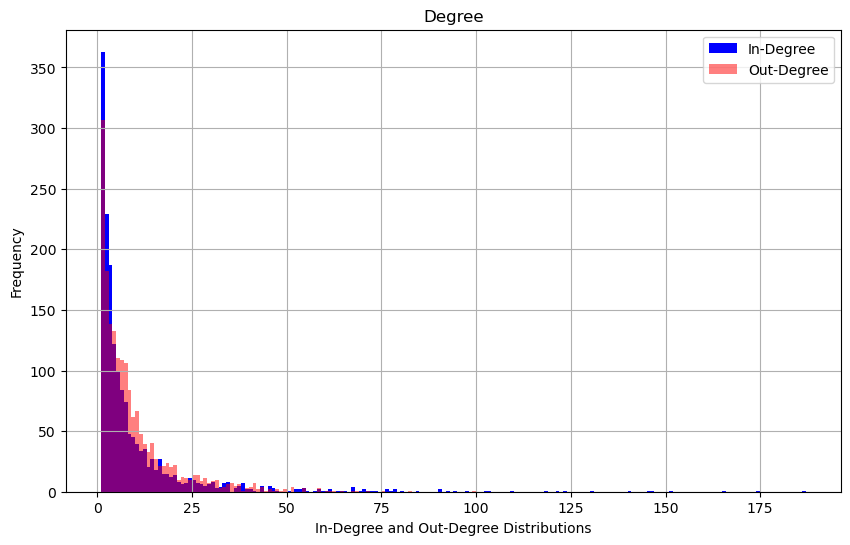

In [35]:
import matplotlib.pyplot as plt

# Extract in-degree and out-degree distributions
in_degrees = [G.in_degree(node) for node in G.nodes()]
out_degrees = [G.out_degree(node) for node in G.nodes()]

# Plotting the in-degree distribution
plt.figure(figsize=(10, 6))

plt.hist(in_degrees, bins=range(1, max(in_degrees) + 1), alpha=1, color='b', label='In-Degree')
plt.hist(out_degrees, bins=range(1, max(out_degrees) + 1), alpha=0.5, color='r', label='Out-Degree')
plt.xlabel('In-Degree and Out-Degree Distributions')
plt.ylabel('Frequency')
plt.title('Degree')
plt.legend()
plt.grid()

plt.show()

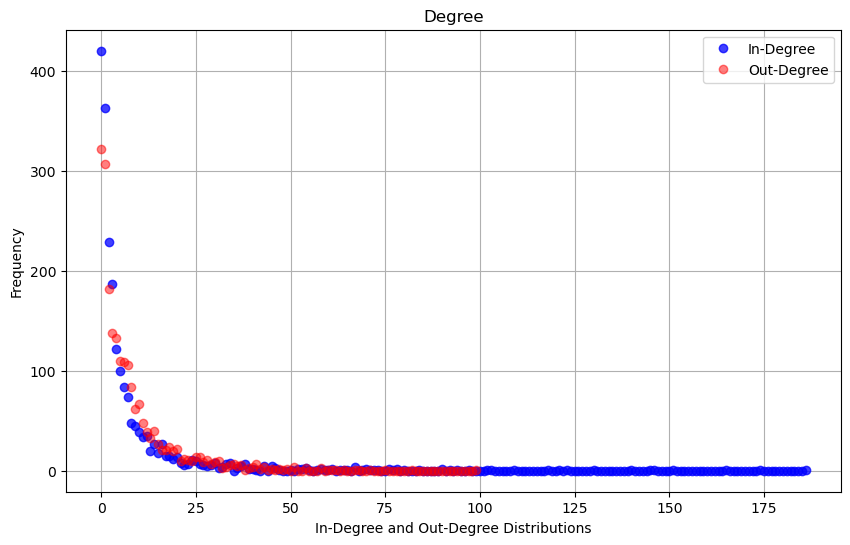

In [37]:
import numpy as np

out_degree_hist = np.histogram(out_degrees , bins=range(max(out_degrees)+1))
in_degree_hist = np.histogram(in_degrees , bins=range(max(in_degrees)+1))

# Plot the degree distributions
plt.figure(figsize=(10, 6))

plt.plot(in_degree_hist[1][:-1], in_degree_hist[0], 'o', label='In-Degree', color='b', alpha=0.75)
plt.plot(out_degree_hist[1][:-1], out_degree_hist[0], 'o', label='Out-Degree', color='r', alpha=0.5)

plt.xlabel('In-Degree and Out-Degree Distributions')
plt.ylabel('Frequency')
plt.title('Degree')
plt.legend()
plt.grid()

plt.show()


The in-degree distribution is different from the out-degree distribution because in real-world networks there are certain nodes (performers) that are more popular or have more incoming connections than others, while others may have a lot of outgoing links but not many incoming connections.

In [38]:

# Comparison with random and scale-free networks
# Create a random graph
random_graph = nx.gnp_random_graph(G.number_of_nodes(), G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes() - 1)), directed=True)
random_in_degrees = [random_graph.in_degree(node) for node in random_graph.nodes()]
random_out_degrees = [random_graph.out_degree(node) for node in random_graph.nodes()]

# Create a scale-free graph
scale_free_graph = nx.barabasi_albert_graph(G.number_of_nodes(), 2)  # m=2
scale_free_in_degrees = [scale_free_graph.in_degree(node) for node in scale_free_graph.nodes()]
scale_free_out_degrees = [scale_free_graph.out_degree(node) for node in scale_free_graph.nodes()]

# Compare distributions
plt.figure(figsize=(14, 6))

# Random graph comparison for out-degrees
plt.subplot(1, 2, 1)
plt.hist(random_out_degrees, bins=range(1, max(random_out_degrees) + 1), alpha=0.5, color='g', label='Random Network', edgecolor='black', histtype='stepfilled')
plt.scatter(random_out_degrees, [0]*len(random_out_degrees), color='green', alpha=0.5)  # Overlay with dots for random
plt.hist(out_degrees, bins=range(1, max(out_degrees) + 1), alpha=0.5, color='r', label='Original Network', edgecolor='black', histtype='stepfilled')
plt.scatter(out_degrees, [0]*len(out_degrees), color='red', alpha=0.5)  # Overlay with dots for original
plt.title('Out-Degree Distribution Comparison')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.legend()

# Scale-free graph comparison for in-degrees
plt.subplot(1, 2, 2)
plt.hist(scale_free_in_degrees, bins=range(1, max(scale_free_in_degrees) + 1), alpha=0.5, color='m', label='Scale-Free Network', edgecolor='black', histtype='stepfilled')
plt.scatter(scale_free_in_degrees, [0]*len(scale_free_in_degrees), color='magenta', alpha=0.5)  # Overlay with dots for scale-free
plt.hist(in_degrees, bins=range(1, max(in_degrees) + 1), alpha=0.5, color='b', label='Original Network', edgecolor='black', histtype='stepfilled')
plt.scatter(in_degrees, [0]*len(in_degrees), color='blue', alpha=0.5)  # Overlay with dots for original
plt.title('In-Degree Distribution Comparison')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

AttributeError: 'Graph' object has no attribute 'in_degree'

In [40]:

# Identify the top 5 most connected performers (in-degrees and out-degrees)
top_in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
top_out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Performers by In-Degree:")
for performer, degree in top_in_degrees:
    print(f"{performer}: {degree}")

print("\nTop 5 Performers by Out-Degree:")
for performer, degree in top_out_degrees:
    print(f"{performer}: {degree}")

# Find the 10 pages with the longest wiki entries
longest_entries = sorted(G.nodes(data=True), key=lambda x: x[1]['wikitext_length'], reverse=True)[:10]

print("\n10 Pages with the Longest Wiki Entries:")
for performer, data in longest_entries:
    print(f"{performer}: {data['wikitext_length']} words")

Top 5 Performers by In-Degree:
Willie Nelson: 187
Johnny Cash: 174
Elvis Presley: 165
Dolly Parton: 151
George Jones: 146

Top 5 Performers by Out-Degree:
Hillary Lindsey: 100
Pam Tillis: 82
Randy Travis: 75
Vince Gill: 71
Patty Loveless: 68


KeyError: 'wikitext_length'

# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises.
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

And don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.